# Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

%matplotlib inline

# Execise 1

## Data

In [2]:
ex_1 = pd.read_csv("2022_data_practica_encuesta.csv")
ex_1.head()

Id  Servicio wifi a bordo  Hora de salida/llegada conveniente  \
0  19556                      5                                   4   
1  90035                      1                                   1   
2  12360                      2                                   0   
3  77959                      0                                   0   
4  36875                      2                                   3   

   Facilidad de reserva en línea  Ubicación de la puerta  Alimentos y bebidas  \
0                              3                       4                    3   
1                              3                       1                    5   
2                              2                       4                    2   
3                              0                       2                    3   
4                              4                       3                    4   

   Embarque en línea  Comodidad del asiento  Entretenimiento a bordo  \
0                  4                      3                        5   
1                  4                      5                        4   
2                  2                      2                        2   
3                  4                      4                        1   
4                  1                      2                        2   

   Servicio a bordo  Servicio de sala de piernas  Manejo de equipaje  \
0                 5                            5                   5   
1                 4                            4                   4   
2                 4                            1                   3   
3                 1                            1                   1   
4                 2                            2                   2   

   Servicio de facturación  Servicio a bordo.1  Limpieza  
0                        2                   5         5  
1                        3                   4         5  
2                        2                   2         2  
3                        3                   1         4  
4                        4                   2         4

In [3]:
#We drop the Id columns as it is only the identifier for each respondent
ex_1.drop(columns="Id", axis = 1, inplace = True)

## EDA

In [4]:
#There are no missing values, but we have two columns named pretty much the same
ex_1.isnull().sum()

Servicio wifi a bordo                 0
Hora de salida/llegada conveniente    0
Facilidad de reserva en línea         0
Ubicación de la puerta                0
Alimentos y bebidas                   0
Embarque en línea                     0
Comodidad del asiento                 0
Entretenimiento a bordo               0
Servicio a bordo                      0
Servicio de sala de piernas           0
Manejo de equipaje                    0
Servicio de facturación               0
Servicio a bordo.1                    0
Limpieza                              0
dtype: int64

In [5]:
#These two columns have different values, so we can let them stay
ex_1["Servicio a bordo"].equals(ex_1["Servicio a bordo.1"])

False

In [6]:
ex_1[["Servicio a bordo", "Servicio a bordo.1"]]

Servicio a bordo  Servicio a bordo.1
0                     5                   5
1                     4                   4
2                     4                   2
3                     1                   1
4                     2                   2
...                 ...                 ...
25971                 3                   5
25972                 4                   5
25973                 4                   4
25974                 3                   5
25975                 1                   1

[25976 rows x 2 columns]

In [7]:
ex_1.describe(percentiles=(0.001,0.01,0.99,0.999)).T

count      mean       std  min  0.1%  \
Servicio wifi a bordo               25976.0  2.724746  1.335384  0.0   0.0   
Hora de salida/llegada conveniente  25976.0  3.046812  1.533371  0.0   0.0   
Facilidad de reserva en línea       25976.0  2.756775  1.412951  0.0   0.0   
Ubicación de la puerta              25976.0  2.977094  1.282133  1.0   1.0   
Alimentos y bebidas                 25976.0  3.215353  1.331506  0.0   1.0   
Embarque en línea                   25976.0  3.261665  1.355536  0.0   0.0   
Comodidad del asiento               25976.0  3.449222  1.320090  1.0   1.0   
Entretenimiento a bordo             25976.0  3.357753  1.338299  0.0   1.0   
Servicio a bordo                    25976.0  3.385664  1.282088  0.0   1.0   
Servicio de sala de piernas         25976.0  3.350169  1.318862  0.0   0.0   
Manejo de equipaje                  25976.0  3.633238  1.176525  1.0   1.0   
Servicio de facturación             25976.0  3.314175  1.269332  1.0   1.0   
Servicio a bordo.1                  25976.0  3.649253  1.180681  0.0   1.0   
Limpieza                            25976.0  3.286226  1.319330  0.0   1.0   

                                     1%  50%  99%  99.9%  max  
Servicio wifi a bordo               0.0  3.0  5.0    5.0  5.0  
Hora de salida/llegada conveniente  0.0  3.0  5.0    5.0  5.0  
Facilidad de reserva en línea       0.0  3.0  5.0    5.0  5.0  
Ubicación de la puerta              1.0  3.0  5.0    5.0  5.0  
Alimentos y bebidas                 1.0  3.0  5.0    5.0  5.0  
Embarque en línea                   0.0  4.0  5.0    5.0  5.0  
Comodidad del asiento               1.0  4.0  5.0    5.0  5.0  
Entretenimiento a bordo             1.0  4.0  5.0    5.0  5.0  
Servicio a bordo                    1.0  4.0  5.0    5.0  5.0  
Servicio de sala de piernas         1.0  4.0  5.0    5.0  5.0  
Manejo de equipaje                  1.0  4.0  5.0    5.0  5.0  
Servicio de facturación             1.0  3.0  5.0    5.0  5.0  
Servicio a bordo.1                  1.0  4.0  5.0    5.0  5.0  
Limpieza                            1.0  3.0  5.0    5.0  5.0

array([[<AxesSubplot:title={'center':'Servicio wifi a bordo'}>,
        <AxesSubplot:title={'center':'Hora de salida/llegada conveniente'}>,
        <AxesSubplot:title={'center':'Facilidad de reserva en línea'}>,
        <AxesSubplot:title={'center':'Ubicación de la puerta'}>],
       [<AxesSubplot:title={'center':'Alimentos y bebidas'}>,
        <AxesSubplot:title={'center':'Embarque en línea'}>,
        <AxesSubplot:title={'center':'Comodidad del asiento'}>,
        <AxesSubplot:title={'center':'Entretenimiento a bordo'}>],
       [<AxesSubplot:title={'center':'Servicio a bordo'}>,
        <AxesSubplot:title={'center':'Servicio de sala de piernas'}>,
        <AxesSubplot:title={'center':'Manejo de equipaje'}>,
        <AxesSubplot:title={'center':'Servicio de facturación'}>],
       [<AxesSubplot:title={'center':'Servicio a bordo.1'}>,
        <AxesSubplot:title={'center':'Limpieza'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

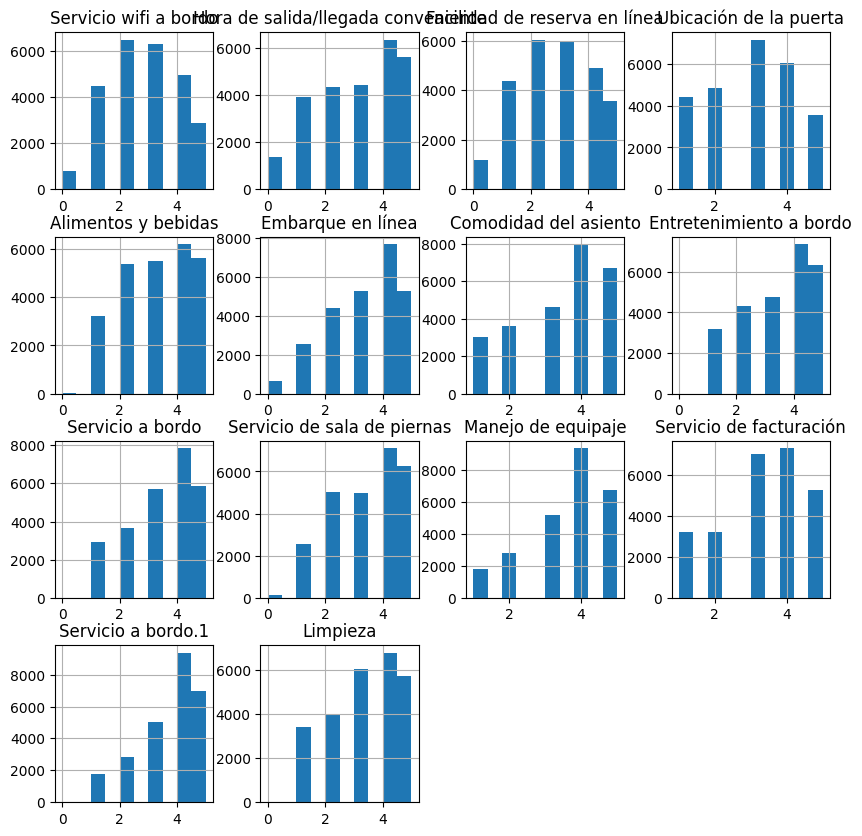

In [8]:
ex_1.hist(figsize=(10,10))

## Scaling Data

In [9]:
ex1_sc = StandardScaler()

In [10]:
ex1_cols = ex_1.columns

In [11]:
ex1_scaled = ex1_sc.fit_transform(ex_1)
ex1_scaled = pd.DataFrame(data=ex1_scaled,columns=ex1_cols)
ex1_scaled.head(10)

Servicio wifi a bordo  Hora de salida/llegada conveniente  \
0               1.703853                            0.621641   
1              -1.291598                           -1.334871   
2              -0.542735                           -1.987042   
3              -2.040460                           -1.987042   
4              -0.542735                           -0.030530   
5               0.206128                           -0.030530   
6               1.703853                            1.273812   
7              -0.542735                           -0.682700   
8               1.703853                           -0.682700   
9              -0.542735                           -0.682700   

   Facilidad de reserva en línea  Ubicación de la puerta  Alimentos y bebidas  \
0                       0.172143                0.797831            -0.161739   
1                       0.172143               -1.542065             1.340348   
2                      -0.535609                0.797831            -0.912783   
3                      -1.951114               -0.762100            -0.161739   
4                       0.879895                0.017866             0.589304   
5                       0.172143                0.017866             1.340348   
6                       1.587647                1.577797            -0.161739   
7                      -0.535609               -0.762100             0.589304   
8                      -0.535609               -0.762100             1.340348   
9                      -0.535609               -0.762100            -0.161739   

   Embarque en línea  Comodidad del asiento  Entretenimiento a bordo  \
0           0.544692              -0.340303                 1.227138   
1           0.544692               1.174774                 0.479907   
2          -0.930768              -1.097842                -1.014556   
3           0.544692               0.417235                -1.761787   
4          -1.668498              -1.097842                -1.014556   
5           1.282422              -0.340303                 1.227138   
6           1.282422               1.174774                 1.227138   
7           0.544692               1.174774                 0.479907   
8           1.282422               1.174774                 1.227138   
9           0.544692               0.417235                 0.479907   

   Servicio a bordo  Servicio de sala de piernas  Manejo de equipaje  \
0          1.259170                     1.250974            1.161716   
1          0.479178                     0.492730            0.311739   
2          0.479178                    -1.782001           -0.538238   
3         -1.860800                    -1.782001           -2.238193   
4         -1.080807                    -1.023758           -1.388216   
5          0.479178                    -0.265514           -2.238193   
6          1.259170                     1.250974            1.161716   
7          0.479178                     0.492730            0.311739   
8         -1.080807                    -1.023758            1.161716   
9          0.479178                     0.492730            0.311739   

   Servicio de facturación  Servicio a bordo.1  Limpieza  
0                -1.035348            1.144063  1.298998  
1                -0.247517            0.297077  1.298998  
2                -1.035348           -1.396893 -0.974927  
3                -0.247517           -2.243878  0.541023  
4                 0.540315           -1.396893  0.541023  
5                -1.823179           -1.396893  1.298998  
6                 0.540315            1.144063 -0.216952  
7                 1.328146            0.297077 -0.216952  
8                -0.247517           -0.549908  1.298998  
9                 1.328146            0.297077  0.541023

## Factor Analysis

### Bartlett Spherecity

In [12]:
"""

P-value is < 0.05, we can say there is correlation between variables

"""

ex1_chi2, ex1_p = calculate_bartlett_sphericity(ex1_scaled)
print("Esfericidad de Bartlett")
print("Valor de Chi : ",ex1_chi2)
print("P - value : ",ex1_p)

Esfericidad de Bartlett
Valor de Chi :  152172.39908232106
P - value :  0.0


### KMO test

In [13]:
#As our dataset has a general proportion of variance of ~0.78, we can do Factor Analysis
ex1_kmo_all, ex1_kmo_model = calculate_kmo(ex1_scaled)
print("KMO Test Statisitc", ex1_kmo_model)

KMO Test Statisitc 0.7824143507684171


### Number of Factors

In [14]:
fa = FactorAnalyzer(rotation= None, impute="drop", n_factors=ex1_scaled.shape[1])

In [15]:
fa.fit(ex1_scaled)

FactorAnalyzer(impute='drop', n_factors=14, rotation=None, rotation_kwargs={})

In [16]:
ev,_ = fa.get_eigenvalues()

In [17]:
ev

array([3.7862382 , 2.40860525, 2.18161657, 1.06344892, 0.94395049,
       0.6889982 , 0.52872324, 0.50770035, 0.46268646, 0.36501452,
       0.3305411 , 0.28741198, 0.2595226 , 0.18554213])

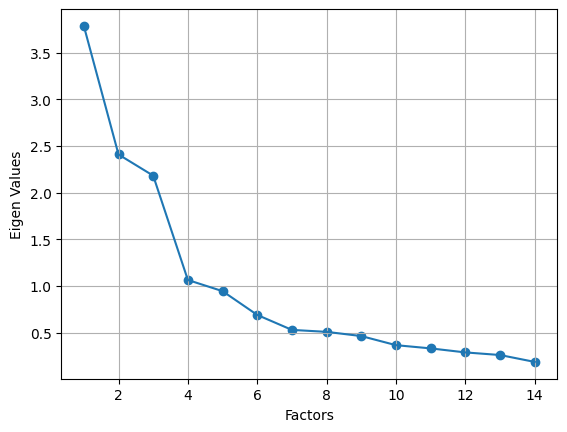

In [18]:
#Given that from the 4th Factor, the EV's are < 1, we will stay with 4 factors
plt.scatter(range(1,ex1_scaled.shape[1]+1),ev)
plt.plot(range(1,ex1_scaled.shape[1]+1),ev)
plt.xlabel('Factors')
plt.ylabel('Eigen Values')
plt.grid()

### Interpretaring Factors

In [19]:
fa = FactorAnalyzer(n_factors=4, rotation="varimax")
fa.fit(ex1_scaled)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [20]:
pd.DataFrame(fa.get_eigenvalues()[0], columns=["EigenValues"])

EigenValues
0      3.786238
1      2.408605
2      2.181617
3      1.063449
4      0.943950
5      0.688998
6      0.528723
7      0.507700
8      0.462686
9      0.365015
10     0.330541
11     0.287412
12     0.259523
13     0.185542

### Factor Weights

In [21]:
cm = sns.light_palette("blue", as_cmap=True)

In [22]:
weights = pd.DataFrame(fa.loadings_, index= ex1_scaled.columns).style.background_gradient(cmap=cm).set_precision(2)

/var/folders/y3/zm6lbc553ylc_67x7h3k3fhh0000gn/T/ipykernel_5357/461296817.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  weights = pd.DataFrame(fa.loadings_, index= ex1_scaled.columns).style.background_gradient(cmap=cm).set_precision(2)


In [23]:
"""
For this Factor Analysis, we can see that the factors 1 & 2 refer more to
in-airplane serivces, while the last 2 factors include the airport services
like takeoff and landing hours
"""
weights

### Diference

In [24]:
dif = pd.DataFrame(fa.get_factor_variance(), index= ["Variance", "Proportional Var", "Cumulative Var"])
dif

0         1         2         3
Variance          2.614813  2.310657  1.846621  1.080291
Proportional Var  0.186772  0.165047  0.131902  0.077164
Cumulative Var    0.186772  0.351819  0.483721  0.560884

### Communities

In [25]:
#Only 3/14 variables have the majority of their variance explained with these 4 factors
coms = pd.DataFrame(fa.get_uniquenesses(), index=ex1_scaled.columns, columns=["Unicity"])
coms

Unicity
Servicio wifi a bordo               0.380922
Hora de salida/llegada conveniente  0.649000
Facilidad de reserva en línea       0.214819
Ubicación de la puerta              0.499015
Alimentos y bebidas                 0.400940
Embarque en línea                   0.313488
Comodidad del asiento               0.370441
Entretenimiento a bordo             0.180963
Servicio a bordo                    0.493557
Servicio de sala de piernas         0.745325
Manejo de equipaje                  0.406054
Servicio de facturación             0.881165
Servicio a bordo.1                  0.354861
Limpieza                            0.257067

# Exercise 2

## Data


In [26]:
ex_2 = pd.read_csv("2022_data_practica_cancer.csv")
ex_2.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

## EDA

In [27]:
ex_2.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [28]:
ex_2.drop(columns=["id"], inplace=True)

In [29]:
#There are no missing values in the dataset
miss = 1 - ex_2.describe().T[['count']] / len(ex_2)
miss

count
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0

In [30]:
ex_2["diagnosis"].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [31]:
#We declare type of variables as continuous and discrete

vard = ["diagnosis"]
varc = [v for v in ex_2.columns.tolist() if v not in vard]

In [32]:
#We set our working data
X2 = ex_2[varc].copy()

In [33]:
X2.describe(percentiles=(0.001,0.01,0.99,0.999)).T

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                               0.1%          1%         50%          99%  \
radius_mean                7.384280    8.458360   13.370000    24.371600   
texture_mean              10.090560   10.930400   18.840000    30.652000   
perimeter_mean            46.135840   53.827600   86.240000   165.724000   
area_mean                158.779200  215.664000  551.100000  1786.600000   
smoothness_mean            0.058242    0.068654    0.095870     0.132888   
compactness_mean           0.021686    0.033351    0.092630     0.277192   
concavity_mean             0.000000    0.000000    0.061540     0.351688   
concave points_mean        0.000000    0.000000    0.033500     0.164208   
symmetry_mean              0.112078    0.129508    0.179200     0.259564   
fractal_dimension_mean     0.050119    0.051504    0.061540     0.085438   
radius_se                  0.113147    0.119740    0.324200     1.291320   
texture_se                 0.361279    0.410548    1.108000     2.915440   
perimeter_se               0.765179    0.953248    2.287000     9.690040   
area_se                    7.043968    8.514440   24.530000   177.684000   
smoothness_se              0.002255    0.003058    0.006380     0.017258   
compactness_se             0.002684    0.004705    0.020450     0.089872   
concavity_se               0.000000    0.000000    0.025890     0.122292   
concave points_se          0.000000    0.000000    0.010930     0.031194   
symmetry_se                0.008823    0.010547    0.018730     0.052208   
fractal_dimension_se       0.000926    0.001114    0.003187     0.012650   
radius_worst               8.354864    9.207600   14.970000    30.762800   
texture_worst             12.286960   15.200800   25.410000    41.802400   
perimeter_worst           52.727440   58.270400   97.660000   208.304000   
area_worst               207.0

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concav

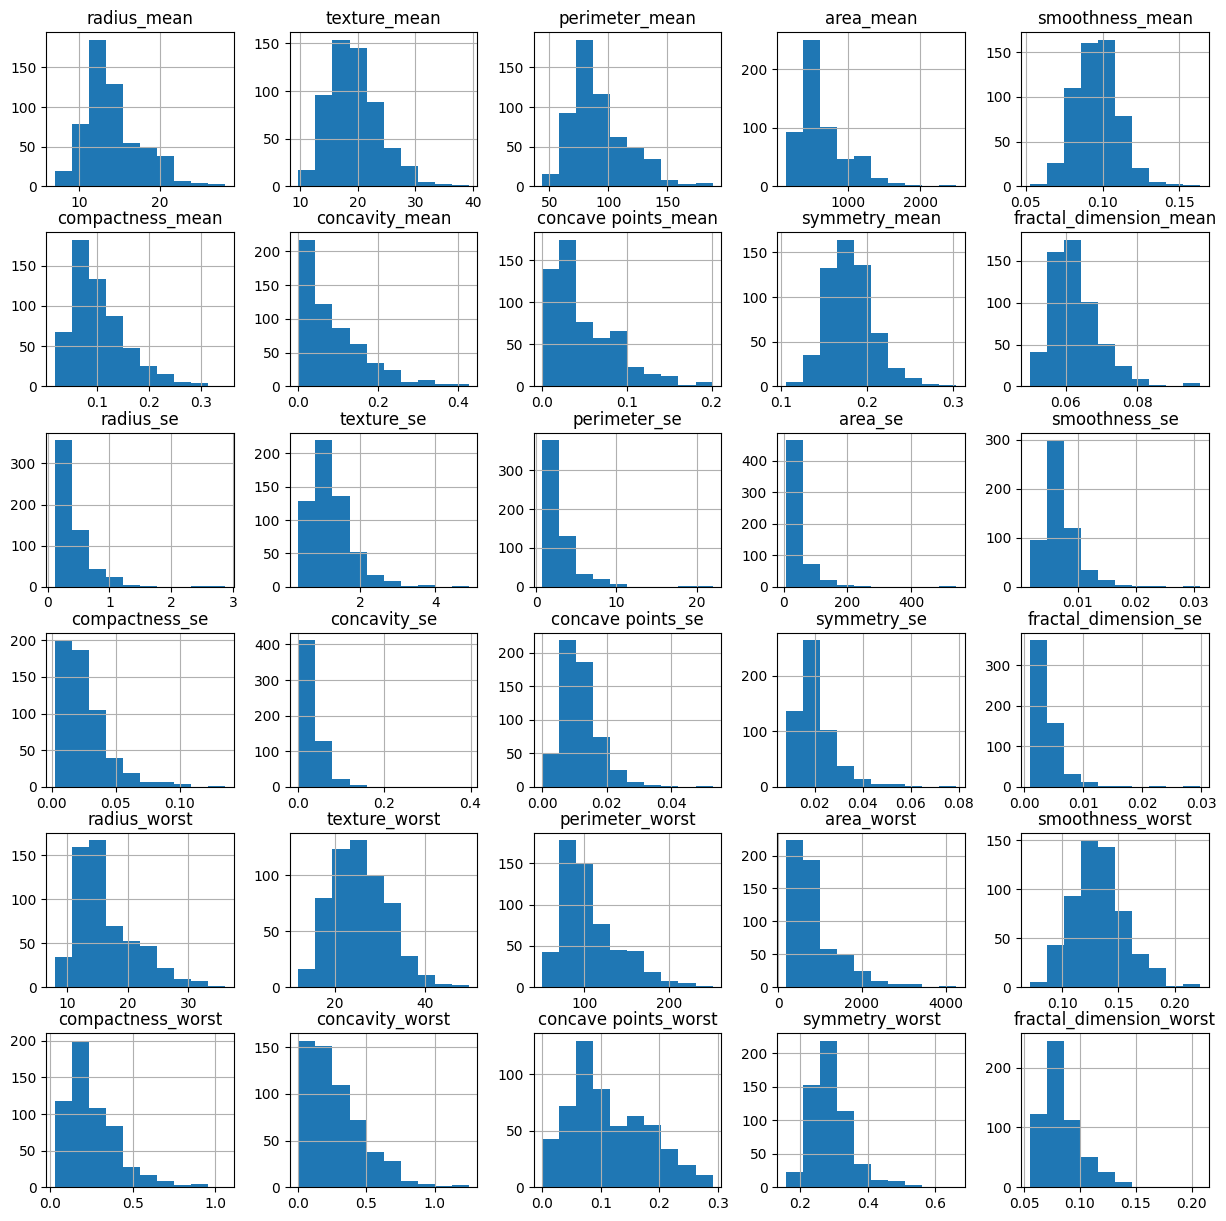

In [34]:
X2.hist(figsize=(15,15))

## PCA

### Defining Components

In [35]:
#We first need to do the PCA with the original components
X2.shape

(569, 30)

Text(0, 0.5, 'Explained Variance')

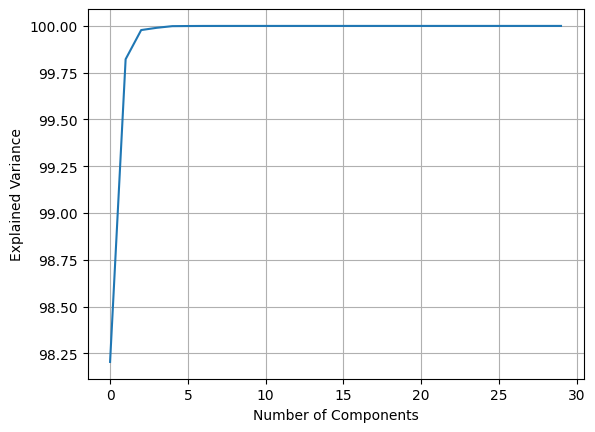

In [36]:
# We'll start with 2 components in this analysis as the majority of the variance seems lo be explained
# with few components
X2_pca30 = PCA(n_components=30)
X2_pca30.fit(X2)

plt.grid()
plt.plot(np.cumsum(X2_pca30.explained_variance_ratio_ * 100))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

### Scaling

In [37]:
X2sc = StandardScaler()
X2sc.fit(X2)

StandardScaler()

In [38]:
X2sc = pd.DataFrame(X2sc.transform(X2), columns=varc)

In [39]:
X2sc.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

### 2 Components

In [40]:
X2_pca2 = PCA(n_components=2)
X2_pca2.fit(X2)

PCA(n_components=2)

In [41]:
X2p = pd.DataFrame(X2_pca2.transform(X2), columns=["d1", "d2"])

In [42]:
X2p[vard[0]] = ex_2[vard[0]]

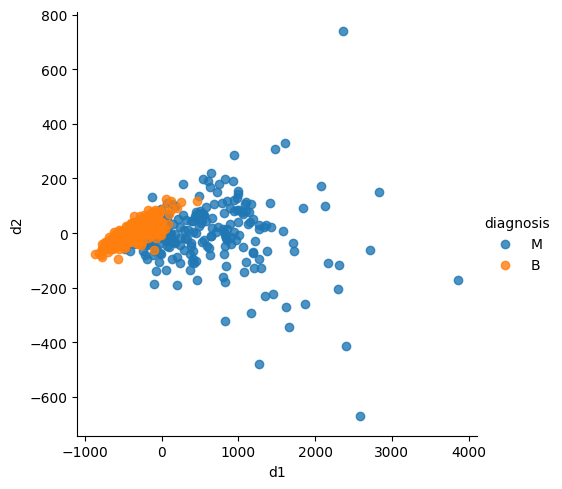

In [43]:
sns.lmplot(data=X2p, x="d1", y="d2", fit_reg=False, hue=vard[0])

### 3 Components

In [44]:
X2_pca3 = PCA(n_components=3)
X2_pca3.fit(X2)

PCA(n_components=3)

In [45]:
X2p3 = pd.DataFrame(X2_pca3.transform(X2), columns=["d1", "d2", "d3"])

In [46]:
X2p3[vard[0]] = ex_2[vard[0]]

In [47]:
fig = px.scatter_3d(X2p3, x='d1', y='d2', z='d3',
              color=vard[0])
fig.show()

## t-SNE

### Scaling

In [48]:
X2sc = StandardScaler().fit_transform(X2)

### 2 Components

In [49]:
X2_tsne2 = TSNE(n_components=2, random_state=0)

In [50]:
X2t2 = pd.DataFrame(X2_tsne2.fit_transform(X2sc), columns=["d1", "d2"])

/Users/davidrinconmorales/Documents/env/diplo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/davidrinconmorales/Documents/env/diplo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [51]:
X2t2[vard[0]] = ex_2[vard[0]]

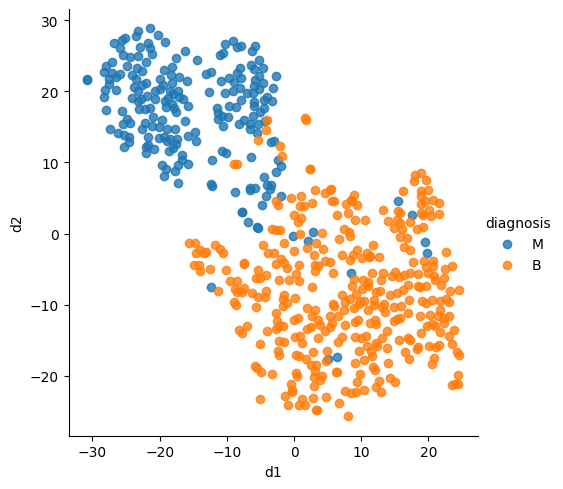

In [52]:
sns.lmplot(data=X2t2, x="d1", y="d2", fit_reg=False, hue=vard[0])

### 3 Components


In [53]:
X2_tsne3 = TSNE(n_components=3, random_state=0)

In [54]:
X2t3 = pd.DataFrame(X2_tsne3.fit_transform(X2sc), columns=["d1", "d2", "d3"])

/Users/davidrinconmorales/Documents/env/diplo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/davidrinconmorales/Documents/env/diplo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [55]:
X2t3[vard[0]] = ex_2[vard[0]]

In [56]:
fig = px.scatter_3d(X2t3, x='d1', y='d2', z='d3',
              color=vard[0])
fig.show()

# Execise 3

## Data

In [57]:
ex_3 =pd.read_csv("2022_data_practica_lenguaje_señas.csv")
ex_3.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       120       107  
1       184       184       182       180  
2       226       225       224       222  
3       230       240       253       255  
4        49        46        46        53  

[5 rows x 785 columns]

## EDA

In [58]:
labels = ex_3["label"].copy()

In [59]:
#We will drop label as reducing dimensions is unsupervised-learning
#We have 7172 images of 784 pixels
ex_3.drop(columns=("label"), inplace = True)
ex_3.shape

(7172, 784)

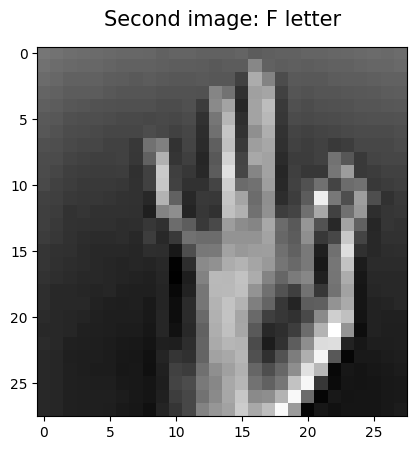

In [60]:
second_image = ex_3.iloc[1].values.reshape([28,28])
plt.imshow(second_image, cmap='gray_r')
plt.title('Second image: F letter', fontsize=15, pad=15)
plt.savefig("Second image.png")

## Scaling

In [61]:
X3sc= StandardScaler().fit_transform(ex_3)

### Explained Variance 

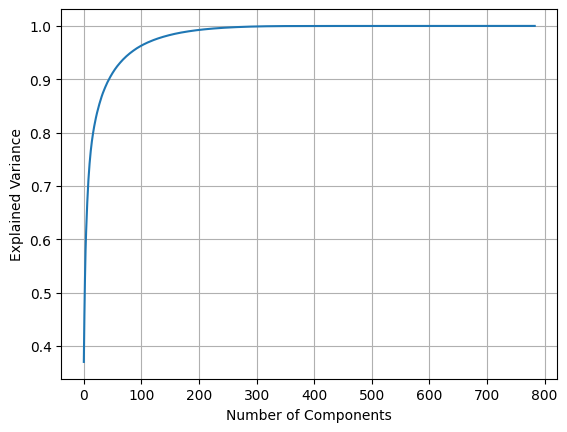

In [62]:
# We check how the variance is explained with the PCA components
#With only 2-3 components we will have a bad representation of the images
pca = PCA()
pca = pca.fit(X3sc)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance');

## PCA

### 2 Components

In [63]:
#As part of this quiz, we need to test 2 and 3 components in order to see which one is better
#2 components
pca2 = PCA(n_components=2)
X3_pca2_reduced = pd.DataFrame(pca2.fit_transform(X3sc))
X3_pca2_recovered = pca2.inverse_transform(X3_pca2_reduced)

In [64]:
X3_pca2_reduced.columns = ["d1", "d2"]

X3_pca2_reduced["labels"] = labels.copy()

In [65]:
fig = px.scatter(X3_pca2_reduced, x="d1", y="d2", color="labels")
fig.show()

Text(0.5, 1.0, 'PCA 2 Components')

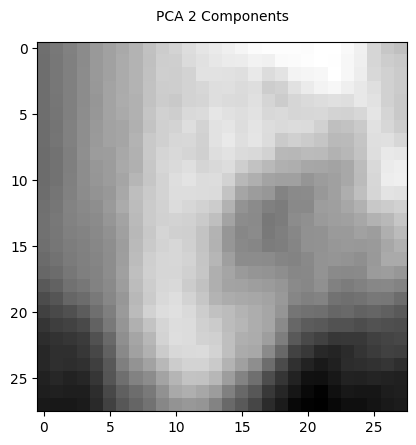

In [66]:
img_pca2 = X3_pca2_recovered[1,:].reshape([28,28])
plt.imshow(img_pca2, cmap="gray_r")
plt.title("PCA 2 Components", fontsize = 10, pad = 15)

In [67]:
# The 3 components PCA can only explain 45% of the variance of the images
np.cumsum(pca2.explained_variance_ratio_*100)[-1]

45.73908458567278

### 3 Components

In [68]:
pca3 = PCA(n_components=3)
X3_pca3_reduced = pd.DataFrame(pca3.fit_transform(X3sc))
X3_pca3_recovered = pca3.inverse_transform(X3_pca3_reduced)

In [69]:
X3_pca3_reduced.columns = ["d1", "d2", "d3"]

X3_pca3_reduced["labels"] = labels.copy()

In [70]:
fig = px.scatter_3d(X3_pca3_reduced, x='d1', y='d2', z='d3',
              color=labels)
fig.show()

Text(0.5, 1.0, 'PCA 3 Components')

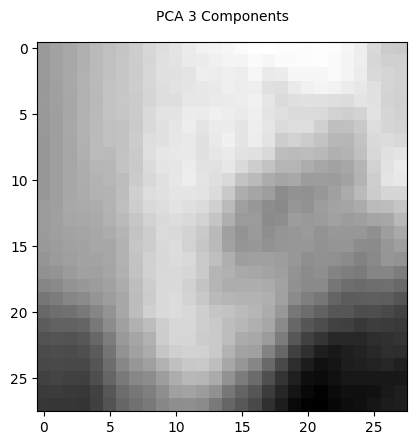

In [71]:
img_pca3 = X3_pca3_recovered[1,:].reshape([28,28])
plt.imshow(img_pca3, cmap="gray_r")
plt.title("PCA 3 Components", fontsize = 10, pad = 15)

In [72]:
# The 3 components PCA can only explain 52% of the variance of the images
np.cumsum(pca3.explained_variance_ratio_*100)[-1]

52.56662915452261

## t-SNE

### 2 Components

In [73]:
X3_tsne2 = TSNE(n_components=2, random_state=0, n_jobs=-1, perplexity=50, n_iter=2000)

df_X3_tsne2 = pd.DataFrame(X3_tsne2.fit_transform(X3sc), columns=["d1", "d2"])
df_X3_tsne2["labels"] = labels

/Users/davidrinconmorales/Documents/env/diplo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/davidrinconmorales/Documents/env/diplo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [74]:
df_X3_tsne2["labels"] = df_X3_tsne2["labels"].astype(str)

In [75]:
fig = px.scatter(df_X3_tsne2, x="d1", y="d2", color="labels")
fig.show()

### 3 Components

In [76]:
X3_tsne3 = TSNE(n_components=3, random_state=0, n_jobs=-1, perplexity=50, n_iter=2000)

df_X3_tsne3 = pd.DataFrame(X3_tsne3.fit_transform(X3sc), columns=["d1", "d2", "d3"])
df_X3_tsne3["labels"] = labels

/Users/davidrinconmorales/Documents/env/diplo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/davidrinconmorales/Documents/env/diplo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [77]:
df_X3_tsne3["labels"] = df_X3_tsne3["labels"].astype(str)

In [78]:
fig = px.scatter_3d(df_X3_tsne3, x='d1', y='d2', z='d3',
              color=labels)
fig.show()